In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [31]:
data=pd.read_csv('sonar.csv',names=range(0,61),header=0)

In [32]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [33]:
data.shape

(207, 61)

In [34]:
df=pd.DataFrame(data=data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[60]=le.fit_transform(df[60])

In [36]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,1


In [37]:
from sklearn.decomposition import PCA

In [29]:
pca=PCA(25)

In [38]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [39]:
x=pca.fit_transform(x)

In [41]:
x

array([[-0.97028528,  1.01765376,  0.83043188, ...,  0.08049884,
        -0.04627863, -0.10937417],
       [-0.32443537,  0.87687629,  0.22820349, ..., -0.10456997,
        -0.17074465,  0.19353575],
       [ 0.85357147,  0.69773427, -0.02360152, ..., -0.01576128,
        -0.081026  , -0.00657512],
       ...,
       [ 0.30676251, -1.1477555 ,  0.24897546, ...,  0.04250622,
        -0.01477151,  0.02327738],
       [-0.03808313, -0.99404889,  0.20193818, ...,  0.09681427,
        -0.03640606, -0.00672553],
       [-0.04390414, -0.91080234,  0.00916917, ...,  0.0485616 ,
        -0.01610006, -0.0265935 ]])

In [45]:
df1=pd.DataFrame(data=x)
df1['Y']=y

In [46]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,Y
0,-0.970285,1.017654,0.830432,0.120147,0.299120,0.202682,-0.226988,0.384837,0.004329,-0.082679,...,0.056259,-0.064081,0.133961,-0.169430,0.019159,0.104920,0.080499,-0.046279,-0.109374,1
1,-0.324435,0.876876,0.228203,0.868926,0.098053,-0.269122,-0.421778,0.081072,0.014185,-0.432334,...,0.338083,0.157120,-0.108477,0.070399,0.077440,-0.017896,-0.104570,-0.170745,0.193536,1
2,0.853571,0.697734,-0.023602,-0.123425,-0.584388,0.351808,0.478187,-0.215424,-0.533955,-0.425182,...,0.101372,-0.145046,-0.152870,-0.013753,0.077919,-0.022199,-0.015761,-0.081026,-0.006575,1
3,-0.061337,0.226034,0.635198,0.152907,0.150982,0.081111,-0.374523,0.070143,0.119454,-0.427480,...,0.043604,0.159234,0.157523,0.071336,0.049197,-0.051740,-0.099255,0.128757,-0.154643,1
4,-0.605423,0.901962,0.804550,0.271896,0.496832,0.464410,-0.224909,0.105504,-0.202842,-0.235048,...,-0.095727,-0.300737,-0.195460,-0.057499,0.036887,0.005205,-0.029316,-0.001879,-0.073119,1


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

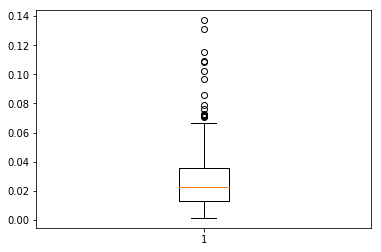

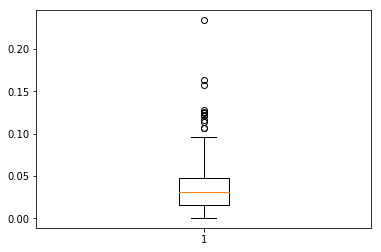

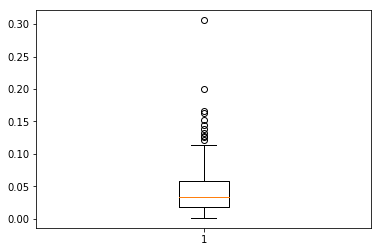

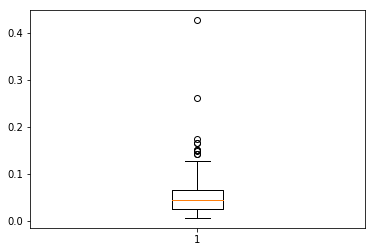

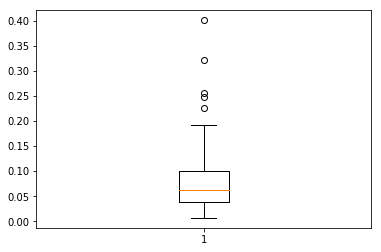

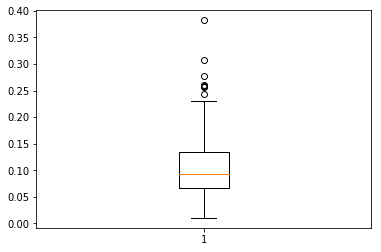

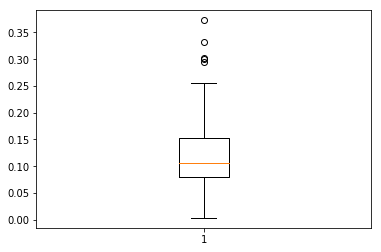

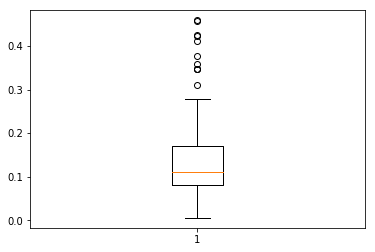

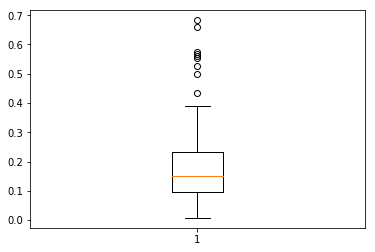

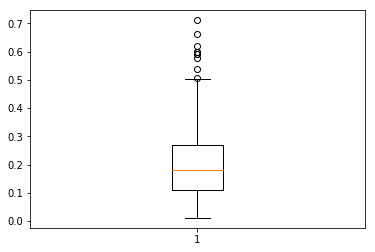

In [49]:
for i in range(0,10):
    gr=plt.boxplot(df[i])
    plt.show(gr)

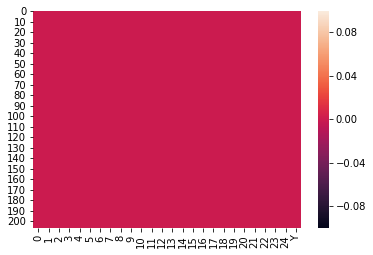

In [50]:
sns.heatmap(df1.isnull())

In [51]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
df_new=df1[(z<3).all(axis=1)]

In [52]:
p=df_new.iloc[:,:-1]
q=df_new.iloc[:,-1]

In [53]:
x_train,x_test,y_train,y_test=train_test_split(p,q,test_size=.33,random_state=47)

In [54]:
model=[LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC()]

In [56]:
for m in model:
    print(m)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('\nAccuracy Score\n',accuracy_score(y_test,pred))
    print("\nConfusion Matrix\n",confusion_matrix(y_test,pred))
    print("\nClassification Report\n",classification_report(y_test,pred))
    

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Accuracy Score
 0.7666666666666667

Confusion Matrix
 [[30  2]
 [12 16]]

Classification Report
               precision    recall  f1-score   support

           0       0.71      0.94      0.81        32
           1       0.89      0.57      0.70        28

   micro avg       0.77      0.77      0.77        60
   macro avg       0.80      0.75      0.75        60
weighted avg       0.80      0.77      0.76        60

GaussianNB(priors=None, var_smoothing=1e-09)

Accuracy Score
 0.8

Confusion Matrix
 [[29  3]
 [ 9 19]]

Classification Report
               precision    recall  f1-score   support

           0       0.76      0.91      0.83        32
           1       0.86      0.68      0.76        28

   micro avg       

In [59]:
def sonar(mod,a):
    score=cross_val_score(mod,p,q,cv=a)
    print(mod)
    print('Score',score)
    print('Mean',score.mean())
    print('Standar Deviation',score.std())

In [60]:
sonar(model[0],5)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Score [0.48648649 0.88888889 0.55555556 0.74285714 0.34285714]
Mean 0.6033290433290432
Standar Deviation 0.19224599663612213


In [61]:
sonar(LogisticRegression(),5)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Score [0.48648649 0.88888889 0.55555556 0.74285714 0.34285714]
Mean 0.6033290433290432
Standar Deviation 0.19224599663612213
